<a href="https://colab.research.google.com/github/WilsonGLan/Platzi/blob/main/5_Descenso_del_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Descenso del gradiente**

## **Dependencias**

In [ ]:
from matplotlib import cm # Para manejar colores
import numpy as np
import matplotlib.pyplot as plt

### Gráfica en 3D de nuestra función de coste

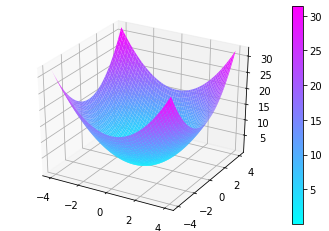

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection":"3d"})
def f(x,y):
  return x**2 + y**2

res = 100

x = np.linspace(-4,4, res)
y = np.linspace(-4,4, res)

X,Y = np.meshgrid(x,y)

Z = f(X,Y)

#genera la superficie
surf = ax.plot_surface(X,Y,Z, cmap = cm.cool)

#agrega la linea vertical de colores
fig.colorbar(surf)

## **Descenso del gradiente**

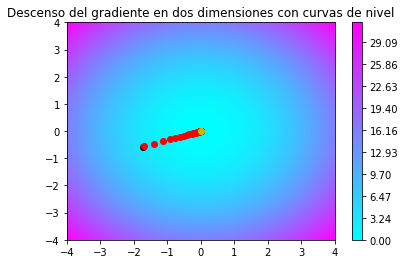

El punto mínimo se encuentra en:  [-0.005 -0.005]


In [ ]:
# primero las curvas de nivel
level_map = np.linspace(np.min(Z), np.max(Z), res)
plt.contourf(X,Y,Z, levels = level_map, cmap=cm.cool)
plt.colorbar()
plt.title("Descenso del gradiente en dos dimensiones con curvas de nivel")

# Se define un punto aleatorio
p = np.random.rand(2) # se usan dos componentes de 0 y 1
p = p * 8 - 4 # Para que los valores sean entre 0 y 4 o 0 y -4

# Graficamos las componentes
""" Hasta aquí cada vez que se ejecute este fragmento de código 
se va a mostrar un punto negro aleatorio"""
plt.plot(p[0], p[1], 'o', c='k')  

h = 0.01
lr = 0.01


def derivate(cp, p):
  return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

# Definimos el punto
def gradient(p):
  grad = np.zeros(2) #vector lleno de ceros
  for idx, val in enumerate(p):
    cp = np.copy(p)
    cp[idx] = cp[idx] + h

    #Se calcula la derivada parcial
    dp = derivate(cp, p)
    grad[idx] = dp

  return grad

for i in range(1000):
  p = p - lr * gradient(p)
  if(i % 10 == 0):
    plt.plot(p[0], p[1], 'o', c='r')

plt.plot(p[0], p[1], 'o', c='y')
plt.show()

print("El punto mínimo se encuentra en: ", p)
